# 1.Data Standardization('Feature Engineering-Scaling'):

feature scaling is the tech to standardize the independent variables
present in the data in a fixed range

why it is important because it helps to build a model which is less sensitive to outliers and works much better with the values that are no variating from each other in a very large range

there are 2 techniques of feature scaling
1. standardization aka z-score
2. normalization

# standardization
Xi' = (Xi - Xmean) / Xstd
where Xmean is the mean of the column and Xstd is the standard deviation of the column

while standaridzation, the mean becomes 0 and the standard deviation becomes 1 of both the axis known as mean centering and variance scaling respectively
if standard deviation is more than 1 then we squeeze the data
known as squeezing




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ads=pd.read_csv(r"C:\Users\devan\OneDrive\Desktop\ML Datasets and Notes\archive\Social_Network_Ads.csv")

In [3]:
ads.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
from sklearn.model_selection import train_test_split
X=ads.drop('Purchased',axis=1)
y=ads['Purchased']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


New_X_train=pd.DataFrame(X_train)

# 1.Standard Scalar

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
# this will make the scalar to learn the parameters
sc.fit(X_train)
# transform train and test sets
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [6]:
x_train=pd.DataFrame(X_train,columns=X.columns)
x_test=pd.DataFrame(X_test,columns=X.columns)

In [7]:
x_train.std().round(2)

Age                1.0
EstimatedSalary    1.0
dtype: float64

In [8]:
x_train.describe().round(2)

,Age,EstimatedSalary
count,320.00,320.00
mean,-0.00,0.00
std,1.00,1.00
min,-1.95,-1.61
25%,-0.77,-0.79
50%,-0.09,0.02
75%,0.70,0.52
max,2.17,2.32


# After Effects of standardization

Text(0.5, 1.0, 'Before Standardization')

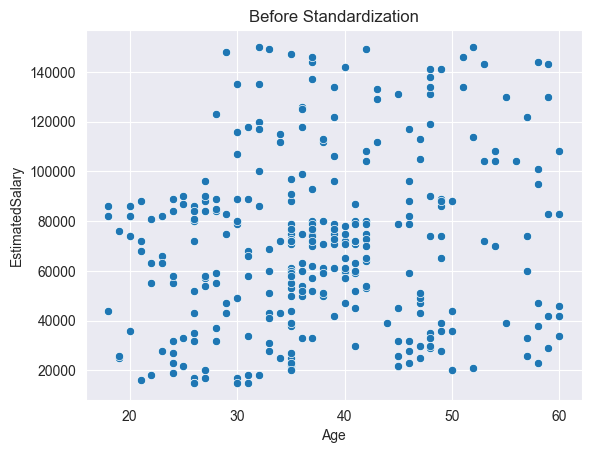

In [9]:
ax1=sns.scatterplot(data=New_X_train,x='Age',y='EstimatedSalary')
ax1.set_title('Before Standardization')

Text(0.5, 1.0, 'After Standardization')

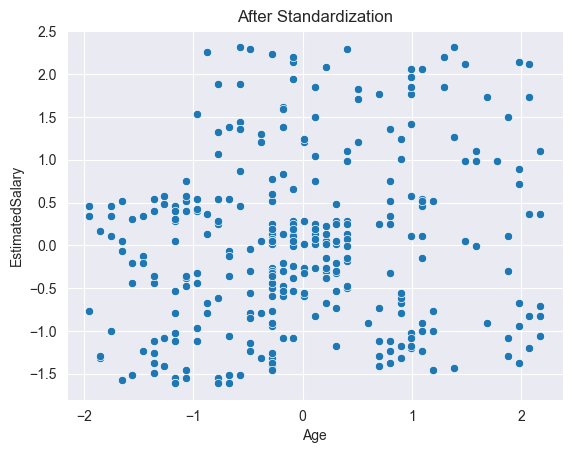

In [10]:
ax2=sns.scatterplot(data=x_train,x='Age',y='EstimatedSalary')
ax2.set_title('After Standardization')

C:\Users\devan\AppData\Local\Temp\ipykernel_13716\2515421229.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(New_X_train,x='Age',hue='EstimatedSalary',kind='kde')


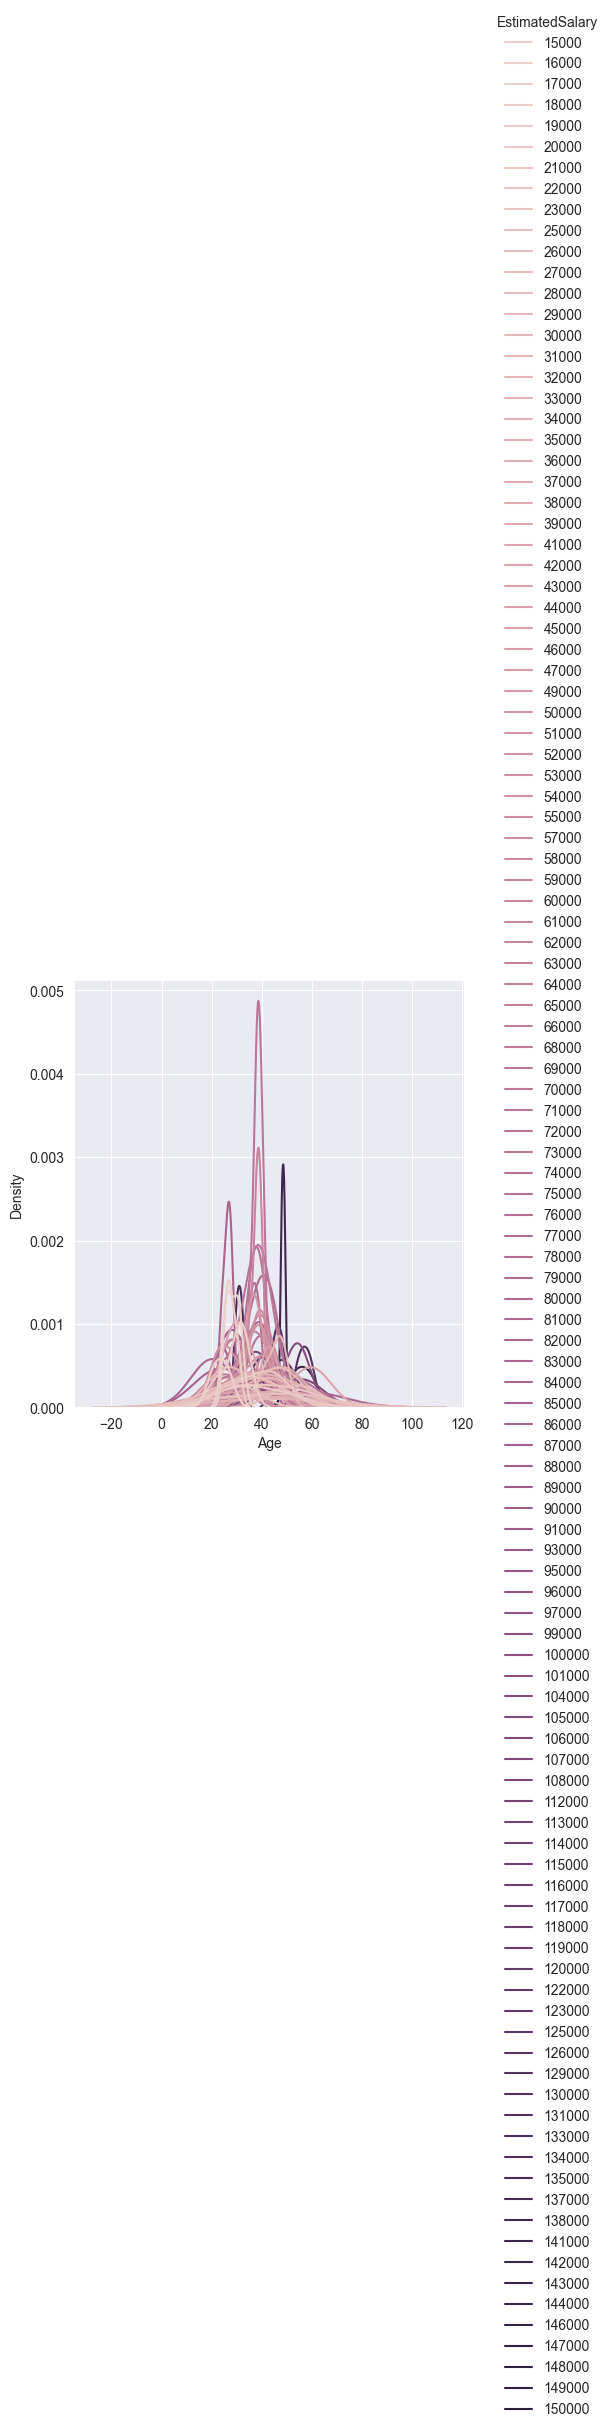

In [11]:
sns.displot(New_X_train,x='Age',hue='EstimatedSalary',kind='kde')


C:\Users\devan\AppData\Local\Temp\ipykernel_13716\3283207831.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(x_train,x='Age',hue='EstimatedSalary',kind='kde')


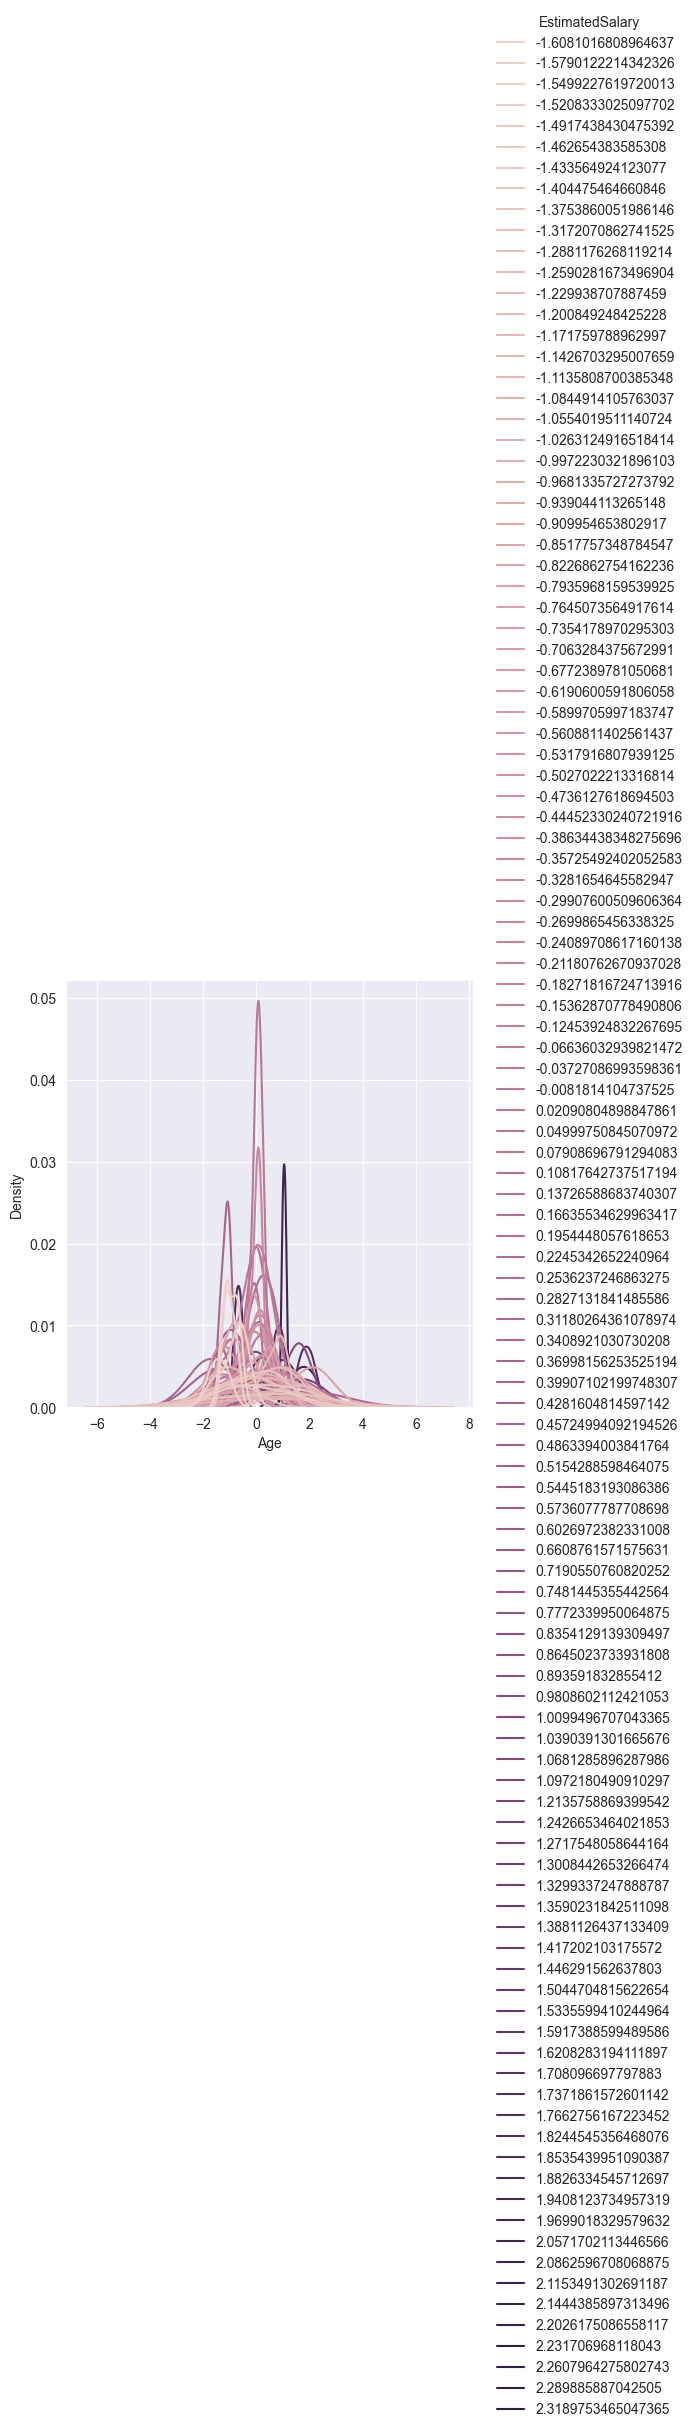

In [12]:
sns.displot(x_train,x='Age',hue='EstimatedSalary',kind='kde')

In [13]:
# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)
plt.show()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# Important algorithms that require's standardization
1. k-means
2. k nearest neighbors
3. pca (principal component analysis)
4. Ann
5. Gradeint descent

# Normalization

Normalization is a technique applied in the part of data preparation. the goal of normalization is to make the data in a fixed range(a commanly used range is between 0 and 1).without distorting differences in the data.

Min-Max Scaling

Xi' = (Xi - Xmin) / (Xmax - Xmin)
where Xmin is the minimum value of the column and Xmax is the max value of the column(it is actually squisshing the data into a unit cube in 2d 3d or hypercube)

Mean Normalization

Xi' = (Xi - Xmean) / Xstd
where Xmean is the mean of the column and Xstd is the standard deviation of the column

Max absolute Scaling

Xi' = (Xi - Xmin) / (Xmax - Xmin)
where Xmin is the minimum value of the column and Xmax is the max value of the column(useful for sparse data(that means some values are missing))

Robust Scaling( Very useful for outliers)

-> Robust is present in SKLearn


Xi' = (Xi - Xmed) / (Xq3 - Xq1)
where Xmed is the median of the column, Xq1 is the first quantile of the column and Xq3 is the third quantile of the column



In [36]:
wine_df=pd.read_csv(r"C:\Users\devan\OneDrive\Desktop\ML Datasets and Notes\wine_data.csv",header=None,usecols=[0,1,2])
wine_df.head()
wine_df.columns=['class','alcohol','malic_acid']
wine_df.head()

,class,alcohol,malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='alcohol', ylabel='Density'>

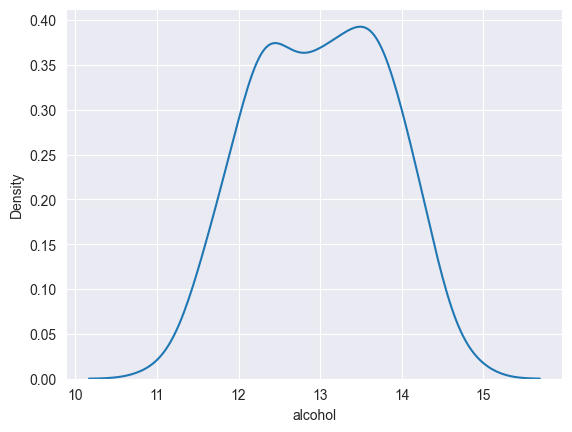

In [37]:
sns.kdeplot(wine_df['alcohol'])

<Axes: xlabel='malic_acid', ylabel='Density'>

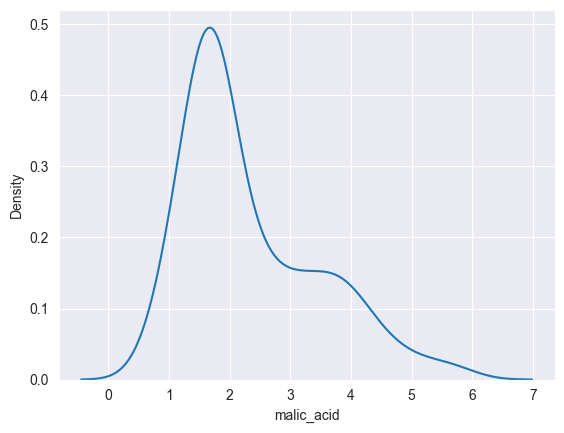

In [38]:
sns.kdeplot(wine_df['malic_acid'])

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X=wine_df.drop('class',axis=1)
y=wine_df['class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
sc=MinMaxScaler()
sc.fit(X_train)
x_train=sc.transform(X_train)
x_test=sc.transform(X_test)

In [41]:
x_train=pd.DataFrame(x_train,columns=X.columns)
x_test=pd.DataFrame(x_test,columns=X.columns)

In [42]:
np.round(x_train.describe(),2)

,alcohol,malic_acid
count,142.00,142.00
mean,0.51,0.30
std,0.22,0.23
min,0.00,0.00
25%,0.34,0.15
50%,0.52,0.20
75%,0.70,0.46
max,1.00,1.00


Text(0.5, 1.0, 'Before Standardization')

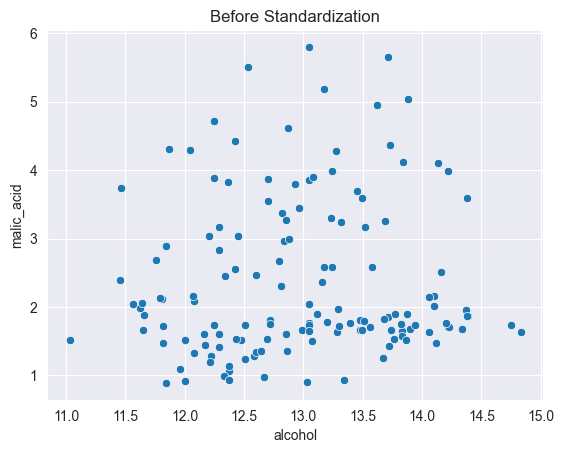

In [44]:
ax1=sns.scatterplot(data=X_train,x='alcohol',y='malic_acid')
ax1.set_title('Before Standardization')

Text(0.5, 1.0, 'After Standardization')

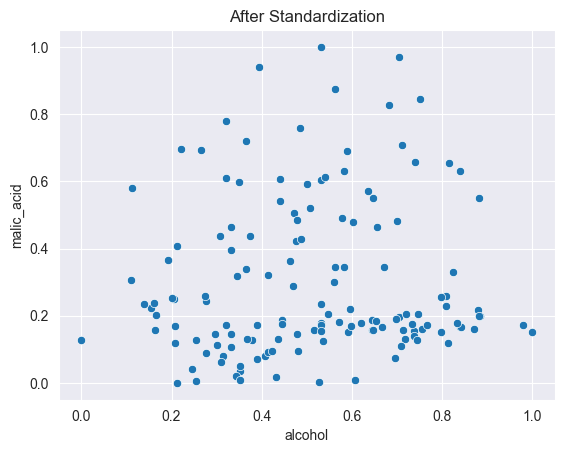

In [45]:
ax2=sns.scatterplot(data=x_train,x='alcohol',y='malic_acid')
ax2.set_title('After Standardization')

C:\Users\devan\AppData\Local\Temp\ipykernel_13716\2016913819.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(x_train,x='alcohol',hue='malic_acid',kind='kde')


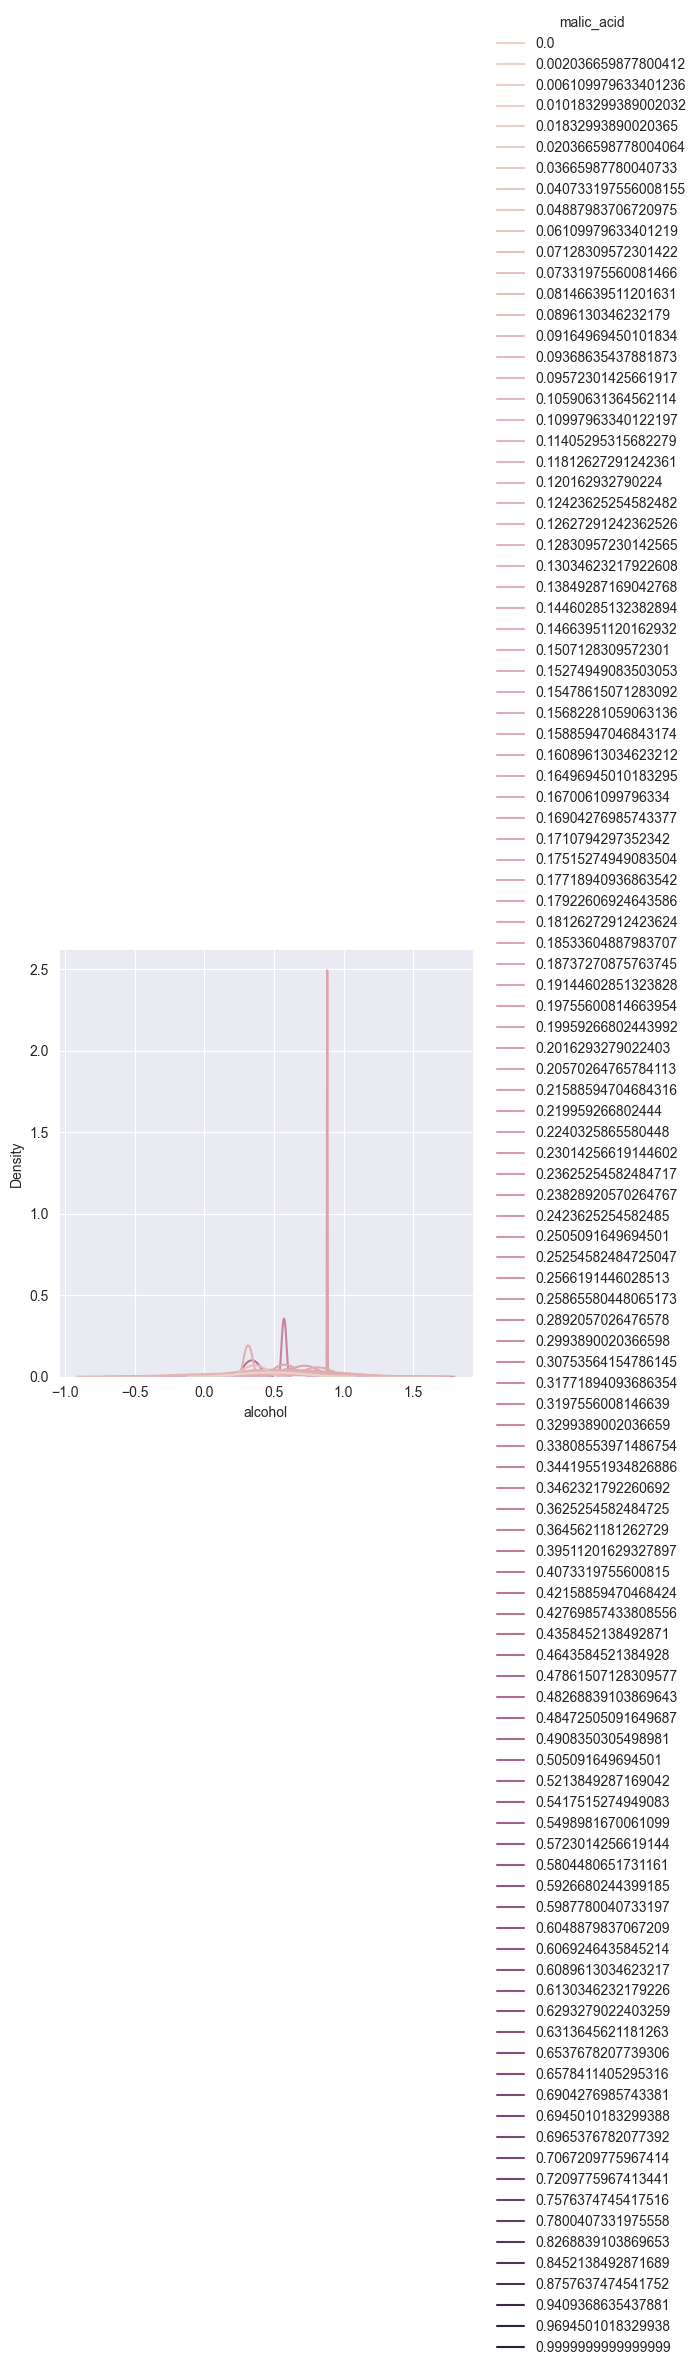

In [46]:
sns.displot(x_train,x='alcohol',hue='malic_acid',kind='kde')

C:\Users\devan\AppData\Local\Temp\ipykernel_13716\2016913819.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(x_train,x='alcohol',hue='malic_acid',kind='kde')


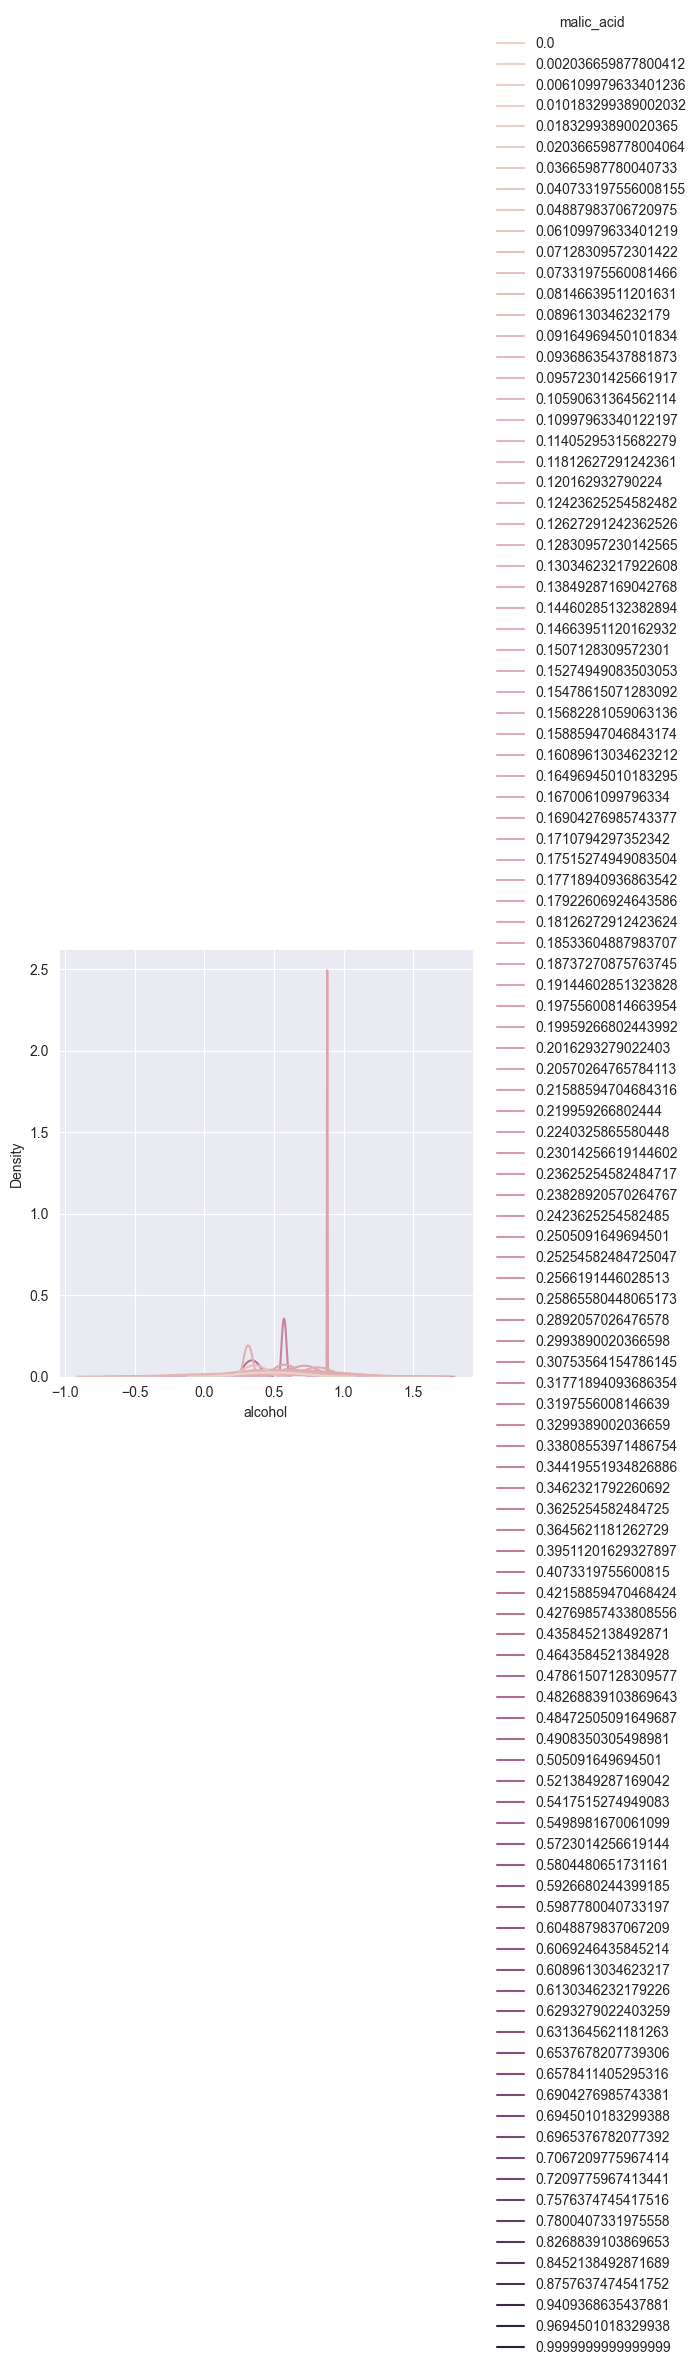

In [47]:
sns.displot(x_train,x='alcohol',hue='malic_acid',kind='kde')

In [48]:
# Normalization is also prone to outliers


# Normalization vs Standardization

-> is feature scaling required?

-> most of the time standardization is required for

-> if you know that your data is fixed in a range go with Notmalization(min-max)(eg CNN)

